In [1]:
import os, sys, warnings

# setting project path
gparent = os.path.join(os.pardir)
sys.path.append(gparent)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def monty_hall(integer):
    """
    Input: An integer n specifying the number of games to be simulated.
    
    Return: The simulated probabilities of winning for each strategy
            after n games, and a graph of the simulated probabilities 
            of winning for each strategy over n games.
    """
    keep_count = [] # count of simutated wins if door is kept
    change_count = [] # count of simulated wins if door is changed
    P_keep = [] # proportion of keep wins after each game 
    P_change = [] # proportion of a change wins after each game
    
    for i in range(integer):
        doors = [1, 2, 3] # door labels
        car_door = np.random.choice(range(1,4)) # set car door
        player_door = np.random.choice(range(1,4)) # set player door
        # set goats doors given car door and player door
        goat_doors = [door for door in doors if\
                      door != car_door and door != player_door]
        # set the door Monty reveals given the goat doors
        revealed_door = np.random.choice(goat_doors)
        # set the change door given the player door and the revealed door
        changed_door = [door for door in doors if\
                        door != player_door and door != revealed_door]
        
        if player_door == car_door:  # keep wins
            keep_count.append(1)
        else:                        # keep losses
            keep_count.append(0)
        if changed_door == car_door: # change wins
            change_count.append(1)
        else:                        # change losses
            change_count.append(0)
        
        P_k_i = np.mean(keep_count[:i]) # proportion of keep wins in i games
        P_keep.append(P_k_i)
        P_c_i = np.mean(change_count[:i]) # proportion of change wins i games
        P_change.append(P_c_i)
    
    # graphing the results
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(range(integer), P_keep, label='Keep Door')
    plt.plot(range(integer), P_change, label='Change Door')
    plt.ylabel('Probability of Winning', size=15)
    plt.xlabel('Number of Simulations', size=15)
    plt.title('Simulated Probabilities of Winning the Monty Hall Game', size=15)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.legend(prop={'size': 12})
    path = os.path.join(gparent,'figures', 'odds.png')
    plt.savefig(path,  bbox_inches ="tight",\
                    pad_inches = .25, transparent = False)
    plt.show()
    
    # printing results
    print('Simulated Probabilities:')
    print(f'Probability of Winning if Door is Kept:\t \t\
          {round(np.mean(keep_count), 2)}')
    print(f'Probability of Winning if Door is Changed:\t\
          {round(np.mean(change_count), 2)}')      

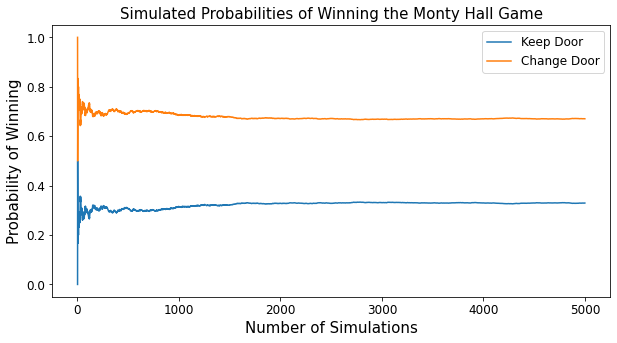

Simulated Probabilities:
Probability of Winning if Door is Kept:	 	          0.33
Probability of Winning if Door is Changed:	          0.67


In [3]:
# Suppressing Mean of empty slice RuntimeWarnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    monty_hall(5000)